<a href="https://colab.research.google.com/github/vikasv123/Car-Price-Prediction/blob/main/Car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
car_data = pd.read_csv(r"/content/Car_full_data.csv")
car_data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# Exploratory Data Analysis

In [ ]:
# show all column name 
car_data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

<ipython-input-137-c0d53ffb3b6b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=car_data.corr()


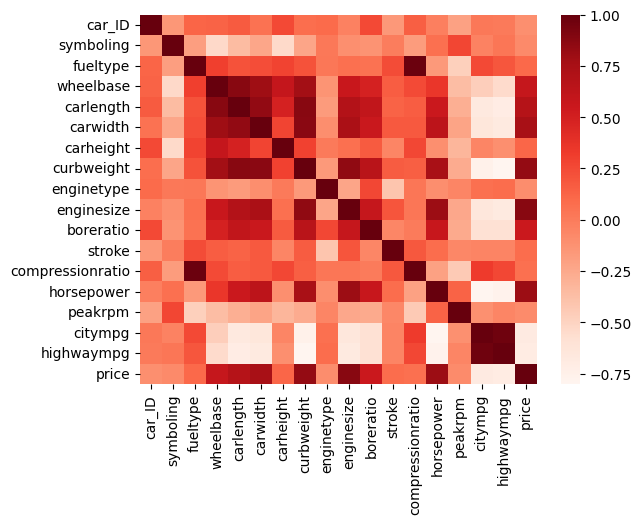

In [ ]:
corr=car_data.corr()
sns.heatmap(corr,cmap="Reds")
plt.show()


In [ ]:
# what is the fueltype in dataset provide
car_data.fueltype.unique()

array(['gas', 'diesel'], dtype=object)

In [ ]:
# replace fueltype into numeric
car_data.fueltype.replace( ['gas', 'diesel'] , [1,2],inplace =True)
car_data["fueltype"].unique()

array([1, 2])

In [ ]:
# what is the enginetype in dataset provide
car_data.enginetype.unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [ ]:
# replace enginetype into numeric
car_data.enginetype.replace( ['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'] , [1,2,3,4,5,6,7],inplace =True)
car_data["enginetype"].unique()

array([1, 2, 3, 4, 5, 6, 7])

In [ ]:
#display min and max for enginesize
print(car_data["enginesize"].min())
print(car_data["enginesize"].max())

61
326


In [ ]:
#display min and max for horse power
print(car_data["horsepower"].min())
print(car_data["horsepower"].max())

48
288


In [ ]:
car_data["fueltype"]=car_data["fueltype"].astype(int)
car_data["enginetype"]=car_data["enginetype"].astype(int)
car_data["enginesize"]=car_data["enginesize"].astype(int)
car_data["horsepower"]=car_data["horsepower"].astype(int)

In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    int64  
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    int64  
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
#car_data.to_csv("car_data.csv")
print(car_data["fueltype"].head(10))
X = car_data[['fueltype', 'enginetype','enginesize','horsepower','price']]
X=X.values
np.set_printoptions(suppress = True)
X
# from numpy import savetxt
# savetxt('car.csv', X, delimiter=',')

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: fueltype, dtype: int64


array([[    1.,     1.,   130.,   111., 13495.],
       [    1.,     1.,   130.,   111., 16500.],
       [    1.,     2.,   152.,   154., 16500.],
       ...,
       [    1.,     2.,   173.,   134., 21485.],
       [    2.,     3.,   145.,   106., 22470.],
       [    1.,     3.,   141.,   114., 22625.]])

In [ ]:
X = car_data[['fueltype', 'enginetype','enginesize','horsepower']].values
print(X)


[[  1   1 130 111]
 [  1   1 130 111]
 [  1   2 152 154]
 [  1   3 109 102]
 [  1   3 136 115]
 [  1   3 136 110]
 [  1   3 136 110]
 [  1   3 136 110]
 [  1   3 131 140]
 [  1   3 131 160]
 [  1   3 108 101]
 [  1   3 108 101]
 [  1   3 164 121]
 [  1   3 164 121]
 [  1   3 164 121]
 [  1   3 209 182]
 [  1   3 209 182]
 [  1   3 209 182]
 [  1   4  61  48]
 [  1   3  90  70]
 [  1   3  90  70]
 [  1   3  90  68]
 [  1   3  90  68]
 [  1   3  98 102]
 [  1   3  90  68]
 [  1   3  90  68]
 [  1   3  90  68]
 [  1   3  98 102]
 [  1   3 122  88]
 [  1   3 156 145]
 [  1   3  92  58]
 [  1   3  92  76]
 [  1   3  79  60]
 [  1   3  92  76]
 [  1   3  92  76]
 [  1   3  92  76]
 [  1   3  92  76]
 [  1   3 110  86]
 [  1   3 110  86]
 [  1   3 110  86]
 [  1   3 110  86]
 [  1   3 110 101]
 [  1   3 110 100]
 [  1   3 111  78]
 [  1   3  90  70]
 [  1   3  90  70]
 [  1   3 119  90]
 [  1   1 258 176]
 [  1   1 258 176]
 [  1   2 326 262]
 [  1   3  91  68]
 [  1   3  91  68]
 [  1   3  9

In [ ]:
Y = car_data[['price']].values
Y

array([[13495.   ],
       [16500.   ],
       [16500.   ],
       [13950.   ],
       [17450.   ],
       [15250.   ],
       [17710.   ],
       [18920.   ],
       [23875.   ],
       [17859.167],
       [16430.   ],
       [16925.   ],
       [20970.   ],
       [21105.   ],
       [24565.   ],
       [30760.   ],
       [41315.   ],
       [36880.   ],
       [ 5151.   ],
       [ 6295.   ],
       [ 6575.   ],
       [ 5572.   ],
       [ 6377.   ],
       [ 7957.   ],
       [ 6229.   ],
       [ 6692.   ],
       [ 7609.   ],
       [ 8558.   ],
       [ 8921.   ],
       [12964.   ],
       [ 6479.   ],
       [ 6855.   ],
       [ 5399.   ],
       [ 6529.   ],
       [ 7129.   ],
       [ 7295.   ],
       [ 7295.   ],
       [ 7895.   ],
       [ 9095.   ],
       [ 8845.   ],
       [10295.   ],
       [12945.   ],
       [10345.   ],
       [ 6785.   ],
       [ 8916.5  ],
       [ 8916.5  ],
       [11048.   ],
       [32250.   ],
       [35550.   ],
       [36000.   ],


# DIFFERENT MODELS

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y, test_size=0.20,shuffle=False,random_state=42)
print("x_train:",x_train.shape)
print("y_train:",y_train.shape)
print("x_test:",x_test.shape)
print("y_test:",y_test.shape)

x_train: (164, 4)
y_train: (164, 1)
x_test: (41, 4)
y_test: (41, 1)


### LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression

from sklearn import metrics
from sklearn.metrics import r2_score


In [ ]:
model1  = LinearRegression()
model1

LinearRegression()

In [ ]:
model1.fit (X,Y)

LinearRegression()

In [ ]:
prediction1=model1.predict(x_test)
prediction1

array([[ 7135.44384793],
       [ 8913.13454963],
       [ 8913.13454963],
       [15916.01162096],
       [15916.01162096],
       [15916.01162096],
       [15916.01162096],
       [15916.01162096],
       [15916.01162096],
       [11455.41972232],
       [11916.58295533],
       [11455.41972232],
       [11455.41972232],
       [11455.41972232],
       [20793.37595044],
       [20793.37595044],
       [20441.83588984],
       [19286.33605327],
       [ 8937.96491328],
       [ 9461.11384994],
       [ 8937.96491328],
       [ 9461.11384994],
       [ 9461.11384994],
       [10062.8931072 ],
       [10515.73403174],
       [ 9812.65391054],
       [ 9812.65391054],
       [14338.66371167],
       [10062.8931072 ],
       [ 9672.0378863 ],
       [15197.64567843],
       [15197.64567843],
       [15197.64567843],
       [15197.64567843],
       [17301.38043994],
       [17301.38043994],
       [15197.64567843],
       [18431.81423593],
       [19713.78249418],
       [18280.99678327],


In [ ]:
score1=(r2_score(y_test,prediction1))*100
print("Accuracy of Linear Regression is",score1,"%")

Accuracy of Linear Regression is 47.232450710924354 %


### Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

from sklearn import metrics
from sklearn.metrics import r2_score


In [ ]:
model2  = DecisionTreeRegressor()
model2

DecisionTreeRegressor()

In [ ]:
model2.fit(X,Y)

DecisionTreeRegressor()

In [ ]:
prediction2=model2.predict(x_test)
prediction2

array([ 7969.42857143,  9418.        ,  9418.        , 11415.66666667,
       11415.66666667, 11415.66666667, 11415.66666667, 11415.66666667,
       11415.66666667, 10270.5       , 10698.        , 10270.5       ,
       10270.5       , 10270.5       , 16278.        , 16278.        ,
       15690.        , 15750.        ,  7885.        ,  8221.66666667,
        7885.        ,  8221.66666667,  8221.66666667, 11670.        ,
        9995.        , 10787.5       , 10787.5       , 16293.75      ,
       11670.        , 12290.        , 16387.5       , 16387.5       ,
       16387.5       , 16387.5       , 18685.        , 18685.        ,
       16387.5       , 19045.        , 21485.        , 22470.        ,
       16387.5       ])

In [ ]:
score2=(r2_score(y_test,prediction2))*100
print("Accuracy of Dicision Tree Regressor is",score2,"%")

Accuracy of Dicision Tree Regressor is 81.47517130118844 %


### Kneighbor Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

from sklearn import metrics
from sklearn.metrics import r2_score


In [ ]:
model3=KNeighborsRegressor(n_neighbors=5,p=2, metric='minkowski')
model3

KNeighborsRegressor()

In [ ]:
model3.fit(X,Y)

KNeighborsRegressor()

In [ ]:
prediction3=model3.predict(x_test)
prediction3

array([[ 7898.    ],
       [ 8661.6   ],
       [ 8661.6   ],
       [10165.    ],
       [10165.    ],
       [10165.    ],
       [10165.    ],
       [10165.    ],
       [10165.    ],
       [10426.    ],
       [ 7982.8   ],
       [10426.    ],
       [10426.    ],
       [10426.    ],
       [16768.8   ],
       [16768.8   ],
       [16239.    ],
       [16099.2   ],
       [ 6939.2   ],
       [ 8571.    ],
       [ 6939.2   ],
       [ 8571.    ],
       [ 8571.    ],
       [ 8749.4   ],
       [13328.    ],
       [10411.    ],
       [10411.    ],
       [16525.    ],
       [ 8749.4   ],
       [10411.    ],
       [16982.    ],
       [16982.    ],
       [16982.    ],
       [16982.    ],
       [18399.8334],
       [18399.8334],
       [16982.    ],
       [18154.8334],
       [27012.2   ],
       [18107.    ],
       [16982.    ]])

In [ ]:
score3=(r2_score(y_test,prediction3))*100
print("Accuracy of KNeighbor Regressor is",score3,"%")

Accuracy of KNeighbor Regressor is 66.94680160102679 %


### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics
from sklearn.metrics import r2_score

In [ ]:
model4=RandomForestRegressor()
model4

RandomForestRegressor()

In [ ]:
model4.fit(X,Y)

<ipython-input-130-840206ec5753>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model4.fit(X,Y)


RandomForestRegressor()

In [ ]:
prediction4=model4.predict(x_test)
prediction4

array([ 7968.94735098,  9373.25190476,  9373.25190476, 11259.26040404,
       11259.26040404, 11259.26040404, 11259.26040404, 11259.26040404,
       11259.26040404, 10274.16404762, 10468.82452381, 10274.16404762,
       10274.16404762, 10274.16404762, 16418.81666667, 16418.81666667,
       15661.90333333, 15817.9725    ,  8038.82111111,  8220.89690476,
        8038.82111111,  8220.89690476,  8220.89690476, 10804.82603896,
       11231.325     , 10718.70267857, 10718.70267857, 16351.42797619,
       10804.82603896, 10750.00381807, 16663.1092717 , 16663.1092717 ,
       16663.1092717 , 16663.1092717 , 18712.19739095, 18712.19739095,
       16663.1092717 , 18331.27002   , 20631.97027778, 19954.19248599,
       16663.1092717 ])

In [ ]:
score4=(r2_score(y_test,prediction4))*100
print("Accuracy of Random Forest Regressor is",score4,"%")

Accuracy of Random Forest Regressor is 79.56734450394194 %


## Comparison of different models

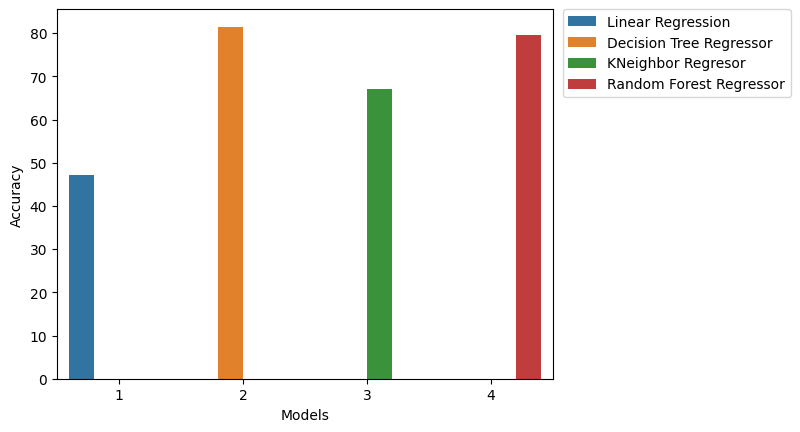

In [ ]:
accuracy=[score1,score2,score3,score4]
num=[1,2,3,4]
models=["Linear Regression","Decision Tree Regressor","KNeighbor Regresor","Random Forest Regressor"]
a=sns.barplot(x=num,y=accuracy,hue=models)
a.set(xlabel="Models",ylabel="Accuracy")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

# We select Decision  Tree Regressor for prediction of car price as we can analyze from the bar graph that it has highest accuracy (R2-SCORE)

# Store/dump the mode

In [ ]:
# import joblib

In [ ]:
# joblib.dump(model2 , 'car_model.joblib' )

['car_model.joblib']

## Load Model file to predict

In [ ]:
# # load the file for use 
# import joblib
# import numpy as np

# NewModel = joblib.load("car_model.joblib")
# d1 = np.array([[ 1,1,130,111]])
# print(NewModel.predict(d1))
# d1 = np.array([[2,3,145,106]])
# print(NewModel.predict(d1)) 

[[12540.42601453]]
[[18280.99678327]]
